# Data Mining Project- Part I: Exploratory Data Analysis #

In this notebook, we will start the analysis of the dataset "DM2425_ABCDEats_DATASET.csv". As such, we will go through a few stages such as data processing and cleaning, data analysis and visualization.

## Table of Contents:
1. **Importing the necessary packages and the main dataframe:**
    - Importing the necessary packages such as pandas, numpy, matplotlib, and seaborn.
    - Loading the dataset.
2. **Exploring the Dataset:**
    - Summarizing essential statistics to understand the dataset's structure and the significance of each feature.
    - Checking for duplicates.
    - Exploring categorical variables and numerical variables.
    - Identifying and treating anomalous values.
3. **Identifying Patterns:**
    - Identifying missing values and treating them.
    - Detecting trends, relationships, and anomalies that may impact further analysis or decision-making.
    - Identifying correlations between features.
4. **Feature Creation:**
    - Creating new features that could enrich the dataset and potentially reveal deeper insights.
5. **Visualization:**
    - Creating visualizations to explore the data and identify potencial patterns and relationships between the features.

**Work developed by:**  
Maria Pereira 20240314  
Miguel Mangerona 20240595  
Rita Morgadito 20240611 

### **1.** Importing the necessary packages and the main dataframe ### 

In [17]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [18]:
df=pd.read_csv("DM2425_ABCDEats_DATASET.csv")

### **2.** Exploring the dataset ###

#### 2.1 Initial analysis of the dataset ####

In [19]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.tail()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24.0,1,1,1,NaN,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34.0,1,1,0,NaN,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30.0,1,1,0,NaN,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


In [21]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 31888 rows and 56 columns.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

The `.describe()` is a method that provides summaru statistics of the dataframe.
 - `df.describe()`: this method only includes numeric columns
 - `df.describe(include='object')`: this method focud on object-type cokumns which usually include categorical values 
- `df.describe(include='all')`: this method show as statistics from both numerical and object columns 

In [23]:
#Checking statistics of the columns with numerical type
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,280.210000,896.710000,229.220000,326.100000,...,13.000000,23.000000,22.000000,20.000000,24.000000,35.000000,36.000000,11.000000,15.000000,13.000000


In [24]:
#Checking statistics of the columns with object type
df.describe(include="object").T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


In [25]:
df.describe(include = "all")

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31888,31888,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888,31888,...,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
unique,31875,9,NaN,NaN,NaN,NaN,NaN,NaN,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,742ca068fc,8670,NaN,NaN,NaN,NaN,NaN,NaN,-,CARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,9761,NaN,NaN,NaN,NaN,NaN,NaN,16748,20161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,NaN,NaN,...,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,NaN,NaN,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,NaN,NaN,...,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,NaN,NaN,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 2.2 Identifying and treating anomalous values ###

In [26]:
#Substitute the Nan values with the median of the respective column
df['customer_age'].fillna(df['customer_age'].median(), inplace=True)

C:\Users\migue\AppData\Local\Temp\ipykernel_23844\338681763.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['customer_age'].fillna(df['customer_age'].median(), inplace=True)


In [27]:
#Switching the customer_id and customer_region columns to integer type for numerical operations
df['customer_age'] = df['customer_age'].astype(int)

### **3.** Identifying patterns ###

In [28]:
#Checking for missing values
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                   0
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

The `.isna()` gives as *False* if the value exist and *True* if the value in the cell is missing 

In [13]:
df.isna()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31883,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31884,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31885,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31886,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#Visualizing which regions exist
df['customer_region'].unique()

array(['2360', '8670', '4660', '2440', '-', '4140', '2490', '8370',
       '8550'], dtype=object)

In [16]:
#Replacing empty customer regions with Nan
df["customer_region"]=df["customer_region"].replace("-",np.nan)

In [17]:
#Checking if there are any duplicated values in the column customer id
print(df['customer_id'].duplicated().sum())

13


In [7]:
#visualizing the available payment methods
df['payment_method'].unique()

array(['DIGI', 'CASH', 'CARD'], dtype=object)

In [8]:
#Concatenate those columns for the customer id
pd.concat(identifier for _, identifier in df.groupby('customer_id') if len(identifier) > 1)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
28706,06018a56be,8550,27.0,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
28713,06018a56be,8550,27.0,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
27653,201a13a34d,8550,28.0,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
27739,201a13a34d,8550,28.0,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
7867,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16227,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
24822,6bbf5f74cd,8550,22.0,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24827,6bbf5f74cd,8550,22.0,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Showing which are the not numerical columns, and their corresponding values (unique values only)
non_numerical_columns = df.select_dtypes(exclude=['number']).columns

for column in non_numerical_columns:
    unique_values = df[column].unique()
    print(f"Column name: {column}")
    print(f"Corresponding values: {unique_values}\n")


Column name: customer_id
Corresponding values: ['1b8f824d5e' '5d272b9dcb' 'f6d1b2ba63' ... 'f74ad8ce3f' 'f7b19c0241'
 'fd40d3b0e0']

Column name: customer_region
Corresponding values: ['2360' '8670' '4660' '2440' nan '4140' '2490' '8370' '8550']

Column name: last_promo
Corresponding values: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']

Column name: payment_method
Corresponding values: ['DIGI' 'CASH' 'CARD']



In [20]:
#Showing the duplicated rows
df[df.duplicated()==True]

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3379,b55012ee1c,8550,23,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7887,24251eb7da,8550,28,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16230,671bf0c738,8550,25,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20907,742ca068fc,8550,20,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24827,6bbf5f74cd,8550,22,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
25793,8aa9bbc147,8550,24,2,4,2,53.0,59,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
27515,cf563a0a98,8550,27,2,2,0,61.0,62,FREEBIE,CASH,...,0,0,0,0,0,0,0,0,0,0
27739,201a13a34d,8550,28,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
28713,06018a56be,8550,27,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Number of duplicated rows in the dataset
df.duplicated().sum()

13

In [10]:
#Checking if the duplicated rows of all the columns are the same as in the column 'customer_id'
df['customer_id'].duplicated().sum()

13

In [11]:
#Checking if it shows the same 
df[df['customer_id'].duplicated()].head(13)

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
3379,b55012ee1c,8550,23.0,4,11,1,2.0,89,FREEBIE,CARD,...,0,0,0,0,0,0,0,0,0,0
7887,24251eb7da,8550,28.0,4,8,3,7.0,85,-,CARD,...,0,1,0,1,0,0,0,0,0,0
16230,671bf0c738,8550,25.0,4,7,3,23.0,66,FREEBIE,CARD,...,0,0,0,1,0,1,0,0,0,0
20907,742ca068fc,8550,20.0,1,2,0,35.0,35,-,CARD,...,0,0,0,0,0,0,0,0,0,0
24329,df91183978,8550,23.0,2,3,1,47.0,52,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,0
24827,6bbf5f74cd,8550,22.0,10,20,9,48.0,88,-,CARD,...,0,0,0,0,0,0,0,0,0,0
25793,8aa9bbc147,8550,24.0,2,4,2,53.0,59,DELIVERY,DIGI,...,0,0,0,0,0,0,0,0,0,0
27515,cf563a0a98,8550,27.0,2,2,0,61.0,62,FREEBIE,CASH,...,0,0,0,0,0,0,0,0,0,0
27739,201a13a34d,8550,28.0,2,2,1,62.0,62,DELIVERY,CARD,...,0,0,0,0,0,0,0,0,0,1
28713,06018a56be,8550,27.0,2,2,0,67.0,89,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Droping the duplicated rows based on 'customer_id' and 'customer_region' columns and keeping the unique values only
#Then, getting the shape
df.drop_duplicates(subset = ['customer_id','customer_region']).shape

(31875, 56)

In [13]:
#Confirming the shape of the dataframe after dropping the duplicates
df.drop_duplicates(subset = ['customer_id']).shape

(31875, 56)

In [14]:
#Setting the customer id as the index of the df
df.set_index('customer_id', inplace=True)

### **4.** New Features ###
**This topic was created to help us improve our analysis by creating new 6 features**

#### 4.1 Creating New Features ####

In [29]:
#Creating a new features list
new_features = []

#### 4.1.1 Money Spent by Costumer ####

In [30]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_features.append('tot_value_cui')

#### 4.1.2 Order Duration ####

In [31]:
#Creating a column that stores the calculation of days since the first order
df['order_duration'] = df['last_order'] - df['first_order']
new_features.append('order_duration')

#### 4.1.3 Order Frequency ####

In [32]:
#Creating a column that stores the frequency of how often a customer places orders (based on their first_order and last_order values)
df['order_frequency'] = df['product_count'] / (df['last_order'] - df['first_order'] + 1) 
new_features.append('order_frequency')

#### 4.1.4 Prefered Time of the Day ####

In [33]:
df['preferred_order_hour'] = df[[f'HR_{i}' for i in range(24)]].idxmax(axis=1).str.replace('HR_', '').astype(int)
new_features.append('preferred_order_hour')

#### 4.1.5 Preferred Day of the Week ####

In [34]:
df['preferred_order_day'] = df[[f'DOW_{i}' for i in range(7)]].idxmax(axis=1).str.replace('DOW_', '').astype(int)
new_features.append('preferred_order_day')

#### 4.1.6 Age Group ####

In [35]:
#Creating a column that stores the age group to which the consumer belongs
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create the age_category column
df['age_category'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=False)
new_features.append('age_category')

### 4.2 New Features Statistics ###

In [36]:
df[new_features].describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tot_value_cui,31888.0,NaN,NaN,NaN,38.303043,46.412121,0.0,12.8875,24.14,44.99,1418.33
order_duration,31782.0,NaN,NaN,NaN,35.409288,29.417128,0.0,3.0,34.0,62.0,90.0
order_frequency,31782.0,NaN,NaN,NaN,0.471221,0.649079,0.0,0.093333,0.171053,0.666667,14.0
preferred_order_hour,31888.0,NaN,NaN,NaN,11.635913,5.256446,0.0,9.0,12.0,16.0,23.0
preferred_order_day,31888.0,NaN,NaN,NaN,2.672918,2.032697,0.0,1.0,3.0,4.0,6.0
age_category,31888,7,25-34,15060,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 5. Visualisations ###

##### Visualizations helps us transforming complex data into clear insights, enabling us to uncover patterns and communicate findings effectively.  #####

In [37]:
import seaborn as sb
import matplotlib.pyplot as plt

#### 5.1 Money spent by customer #### - não tou a conseguir


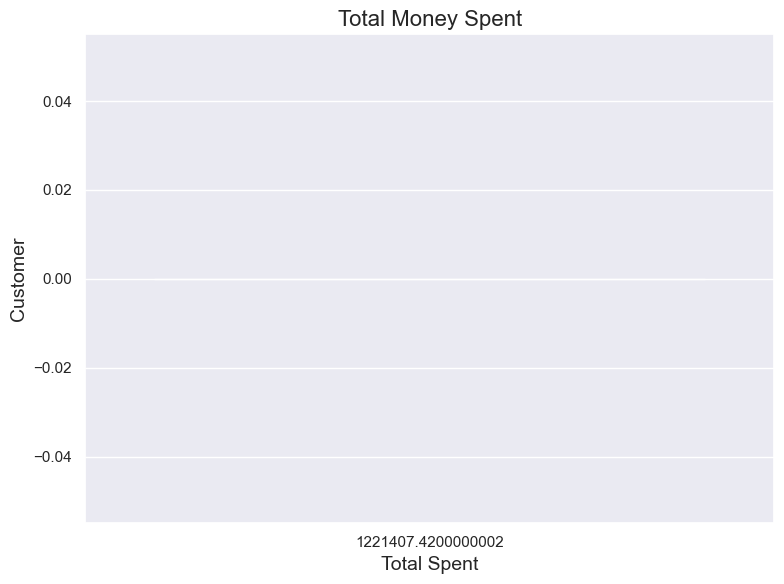

In [38]:
# Confirmar que a nova coluna 'tot_value_cui' foi criada corretamente
if 'tot_value_cui' not in df.columns:
    # Se a coluna não existe, recriar a coluna
    cui_columns = [col for col in df.columns if col.startswith('CUI')]
    df['tot_value_cui'] = df[cui_columns].sum(axis=1)

# Verificar se a coluna 'tot_value_cui' possui dados
if df['tot_value_cui'].isnull().all():
    print("A coluna 'tot_value_cui' está vazia ou contém apenas valores nulos.")
else:
    # Calcular o total de dinheiro gasto
    total_spent = df['tot_value_cui'].sum()

    # Criar um DataFrame para o gráfico
    total_spent_df = pd.DataFrame({'Total Spent': [total_spent]})

    plt.figure(figsize=(8, 6))
    sns.barplot(data=total_spent_df, x='Total Spent', y=total_spent_df.index, color='salmon')

    # Melhorar o título e os rótulos
    plt.title('Total Money Spent', fontsize=16)
    plt.xlabel('Total Spent', fontsize=14)
    plt.ylabel('Customer', fontsize=14)

    # Exibir o gráfico
    plt.tight_layout()
    plt.show()




#### 5.2 Orders by payament type (Graph 1.) ####

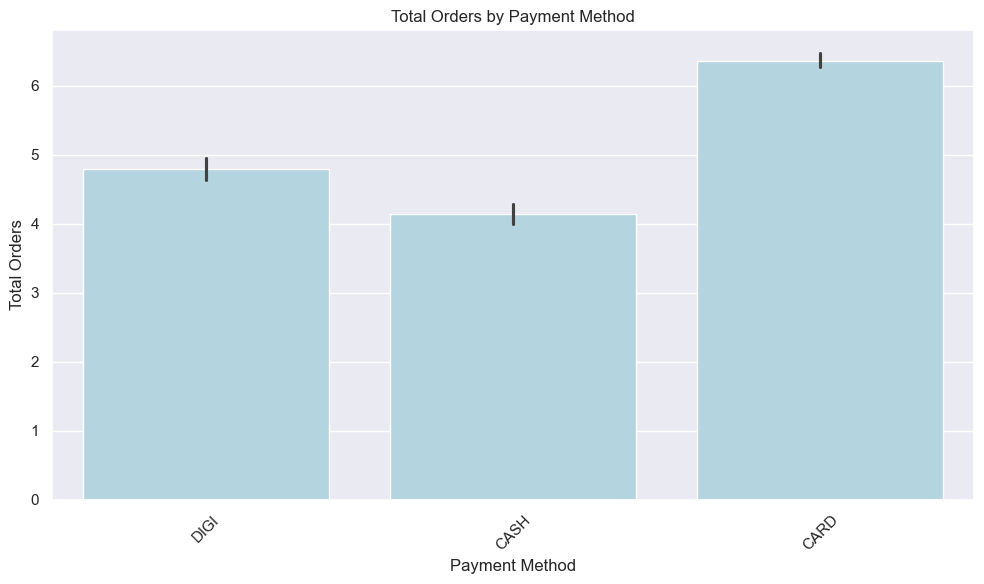

In [39]:
#creating a bar plot to analyze the type of payament that are more predominant 
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='payment_method', y='product_count', color='lightblue')
plt.title('Total Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### 5.3 Orders by region (Graph 2.) ####

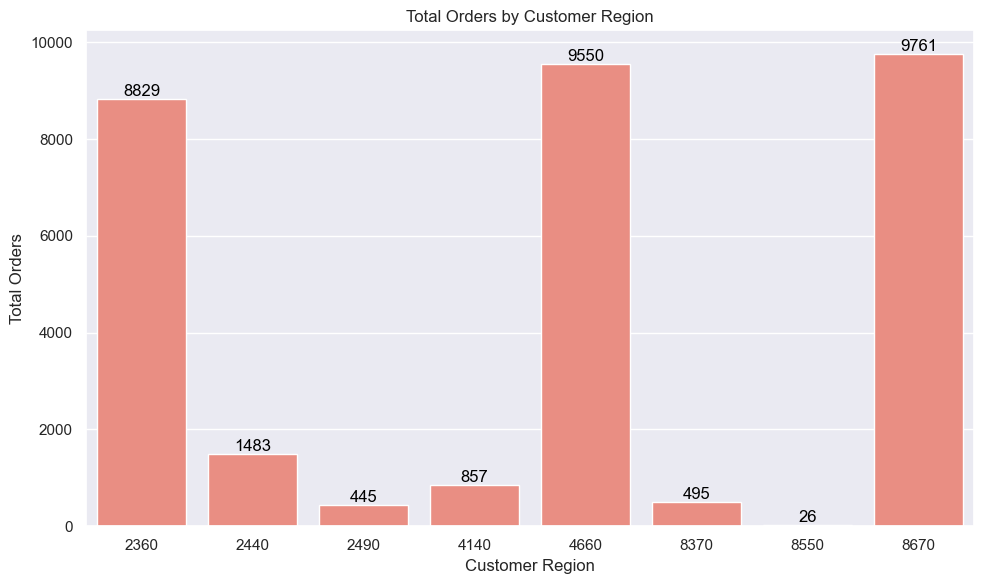

In [40]:
#creating a bar plot to give us some information about the distribution of orders by region 
total_orders = df.groupby('customer_region').size().reset_index(name='total_orders')

plt.figure(figsize=(10, 6))
sns.barplot(data=total_orders, x='customer_region', y='total_orders', color='salmon')
plt.title('Total Orders by Customer Region')
plt.xlabel('Customer Region')
plt.ylabel('Total Orders')

for index, row in total_orders.iterrows():
    plt.text(index, row['total_orders'], row['total_orders'], color='black', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()



#### 5.4 Prefered Cuisine Types ####

##### 5.4.1 Orders by Cuisine Type (Graph 3.) ####

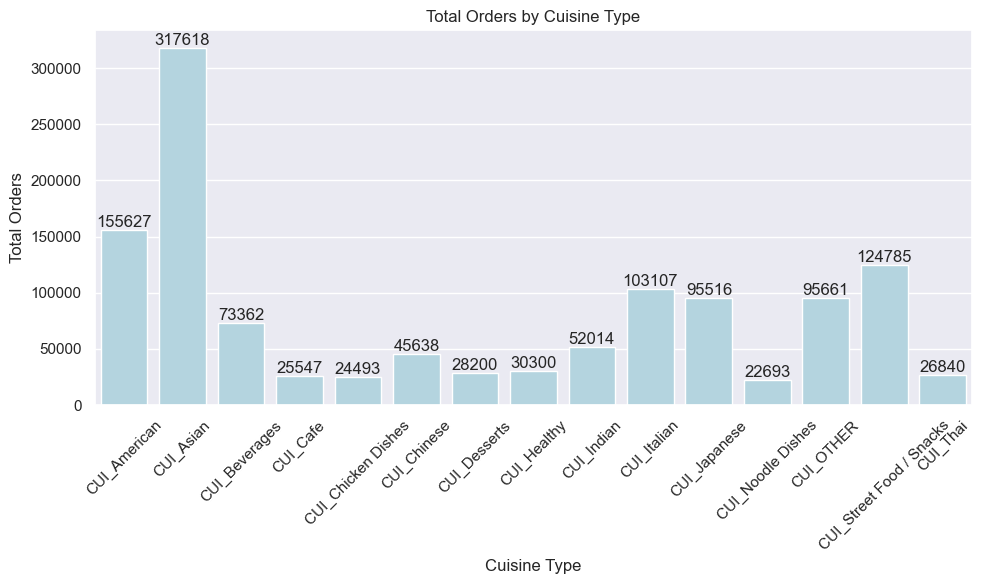

In [41]:
cuisine_columns = ['CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 
                   'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 
                   'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 
                   'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 
                   'CUI_Street Food / Snacks', 'CUI_Thai']

#creating a dataframe with the sum of orders by cuisine type 
total_cuisines = df[cuisine_columns].sum().reset_index()
total_cuisines.columns = ['Cuisine Type', 'Total Orders']
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cuisines, x='Cuisine Type', y='Total Orders', color='lightblue')
plt.title('Total Orders by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Orders')
plt.xticks(rotation=45) 

for index, row in total_cuisines.iterrows():
    plt.text(index, row['Total Orders'], int(row['Total Orders']), ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### 5.4.2 Cuisine Preferences by Region (Graph 4.) ####

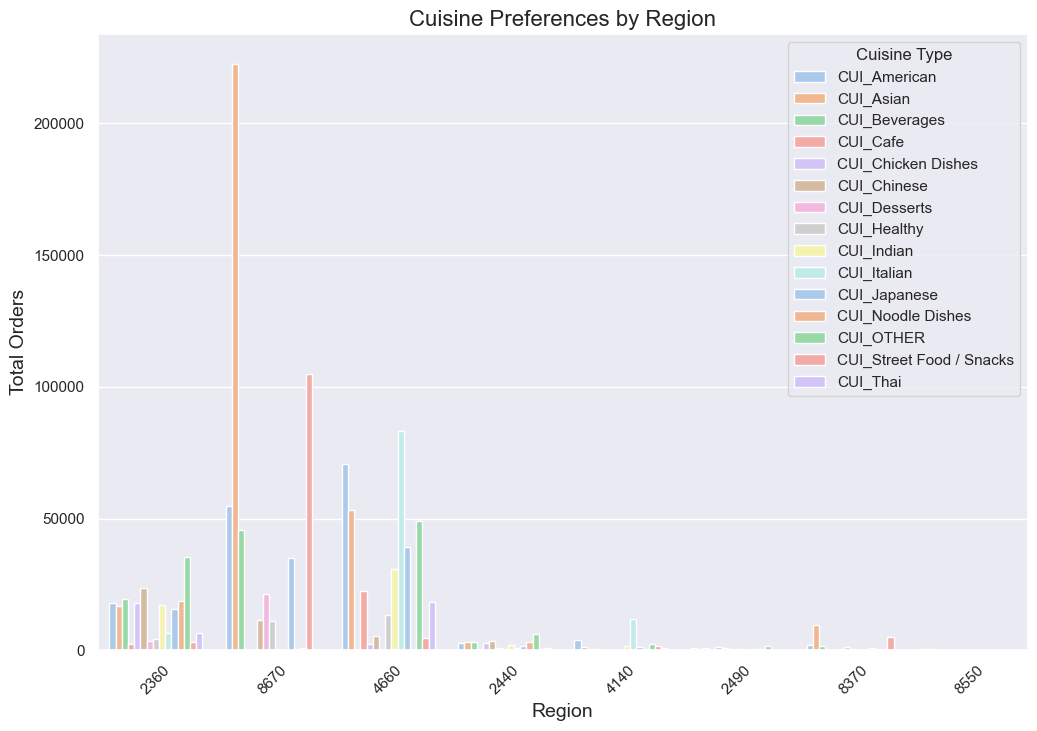

In [42]:
#sum of the orders per region per type of cuisine 
cui_columns = [col for col in df.columns if col.startswith('CUI')]
cuisine_counts = df[cui_columns].sum().reset_index()
cuisine_counts.columns = ['Cuisine Type', 'Count']

region_cuisine = pd.DataFrame()

for region in df['customer_region'].unique():
    region_data = df[df['customer_region'] == region][cui_columns].sum().reset_index()
    region_data.columns = ['Cuisine Type', 'Count']
    region_data['Region'] = region
    region_cuisine = pd.concat([region_cuisine, region_data], ignore_index=True)

plt.figure(figsize=(12, 8))
sns.barplot(data=region_cuisine, x='Region', y='Count', hue='Cuisine Type', palette='pastel')

plt.title('Cuisine Preferences by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=45)

plt.legend(title='Cuisine Type')
plt.show()

##### 5.4.3 Biggest order and total value spent by Cuisine Type (Graph 5.) ####

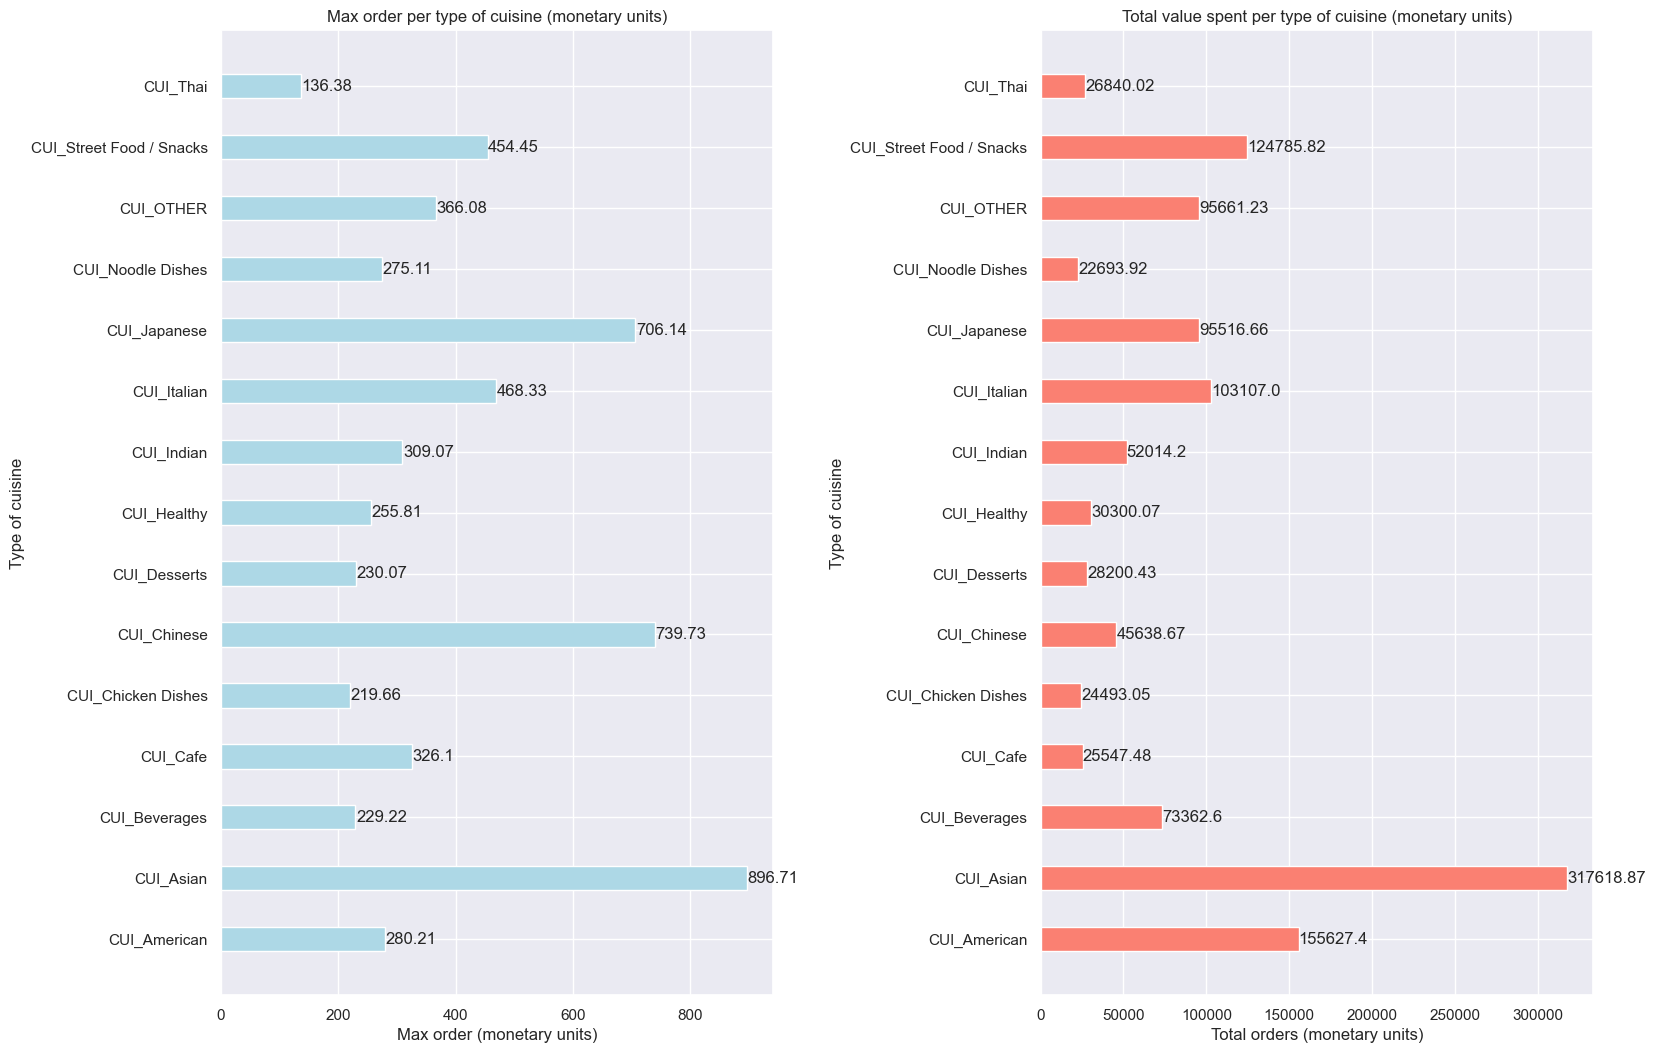

In [65]:
max_values = df[cui_columns].max()
sum_values = df[cui_columns].sum().round(2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 11))

#graph of the bigger order per cuisine type 
axes[0].barh(max_values.index, max_values.values, color='lightblue', height=0.4)
axes[0].set_title('Max order per type of cuisine (monetary units)')
axes[0].set_xlabel('Max order (monetary units)')
axes[0].set_ylabel('Type of cuisine')
for i in range(len(max_values)):
    axes[0].text(max_values.values[i] + 1, i, str(max_values.values[i]), va='center', fontsize=12)

#graph of the total value in monetary units of the cuisine type 
axes[1].barh(sum_values.index, sum_values.values, color='salmon', height=0.4)
axes[1].set_title('Total value spent per type of cuisine (monetary units)')
axes[1].set_xlabel('Total orders (monetary units)')
axes[1].set_ylabel('Type of cuisine')
for i in range(len(sum_values)):
    axes[1].text(sum_values.values[i] + 1, i, str(sum_values.values[i]),va='center', fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

#### 5.5 Preferred Days and Hours ####


##### 5.5.1 Total Orders: weekends and weekdays (Graph 6.) ####

   Category  Total Orders
0  Weekdays         99129
1  Weekends         40184


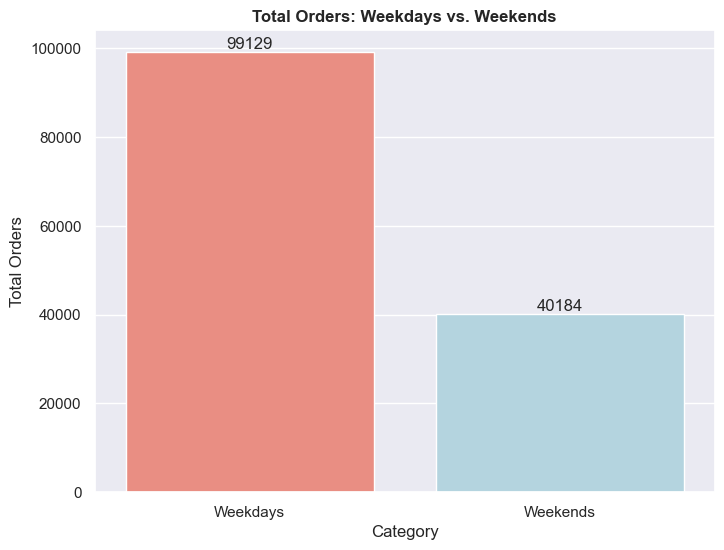

In [44]:

weekday_columns = ['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5']
weekend_columns = ['DOW_0', 'DOW_6']
weekday_orders = df[weekday_columns].sum().sum() 
weekend_orders = df[weekend_columns].sum().sum() 


labels = ['Weekdays', 'Weekends']
sizes = [weekday_orders, weekend_orders]
colors = ['seagreen', 'peru']

orders_data = {'Category': labels, 'Total Orders': sizes}

DOW_orders_df = pd.DataFrame(orders_data)
print(DOW_orders_df)

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Total Orders', data=DOW_orders_df, hue='Category', palette=['salmon', 'lightblue'], legend=False)
plt.title('Total Orders: Weekdays vs. Weekends', fontweight='bold')
plt.ylabel('Total Orders')
plt.xlabel('Category')

for index, row in DOW_orders_df.iterrows():
    plt.text(index, row['Total Orders'], int(row['Total Orders']), ha='center', va='bottom')

plt.show()


##### 5.5.2 Number of Orders by Hour (Graph 7.) ####

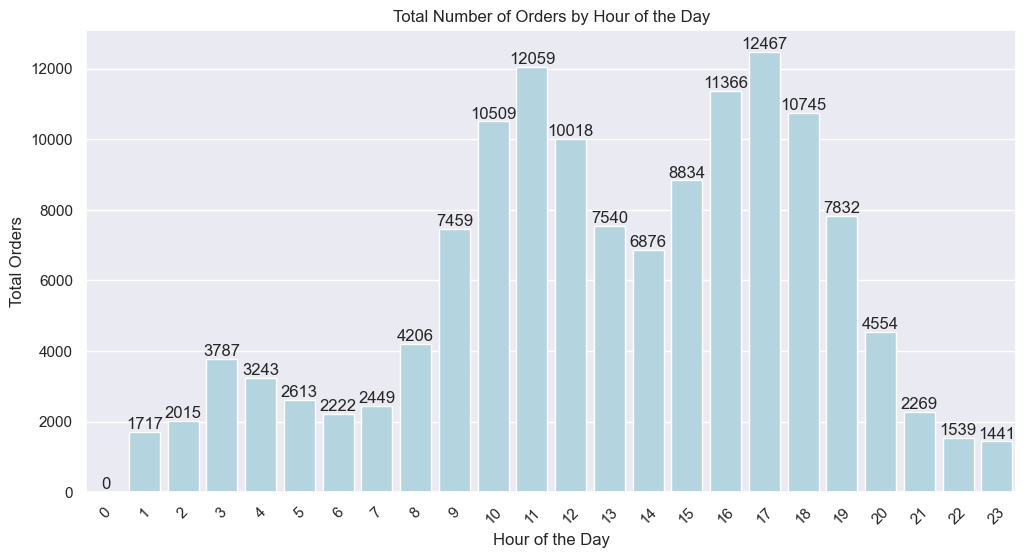

In [45]:

hourly_columns = [f'HR_{i}' for i in range(24)]

hourly_totals = df[hourly_columns].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_totals.index.str.replace("HR_", ""), y=hourly_totals.values, color="lightblue")

plt.title('Total Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)

for index, value in enumerate(hourly_totals.values):
    plt.text(index, value, int(value), ha='center', va='bottom')

plt.show()


##### 5.5.3 Total Number of Orders by Day of the Week (Graph 8.) ####

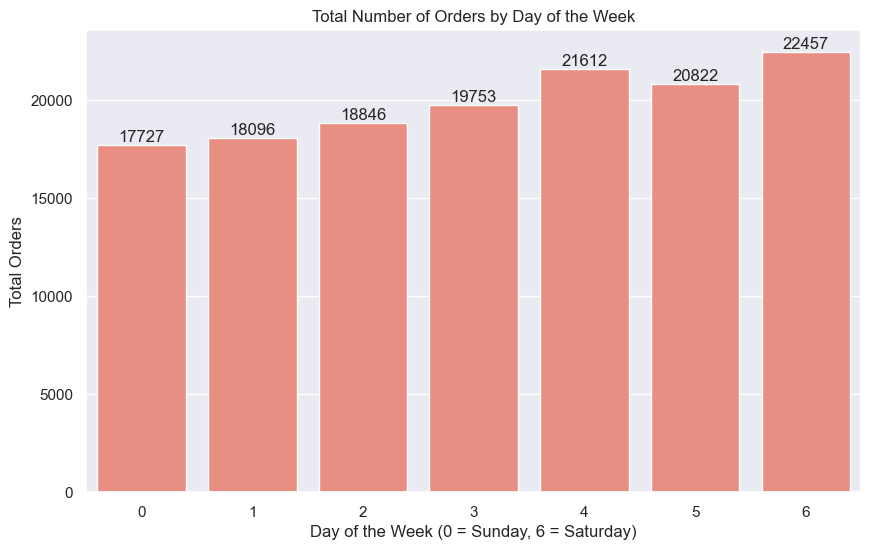

In [46]:
weekly_columns = [f'DOW_{i}' for i in range(7)]

weekly_totals = df[weekly_columns].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_totals.index.str.replace("DOW_", ""), y=weekly_totals.values, color="salmon")

plt.title('Total Number of Orders by Day of the Week')
plt.xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
plt.ylabel('Total Orders')

for index, value in enumerate(weekly_totals.values):
    plt.text(index, value, f'{int(value)}', ha='center', va='bottom')
plt.show()


#### 5.6 Age of the customers ####

##### 5.5.3 Customer Age distribution (Graph 9.) ####

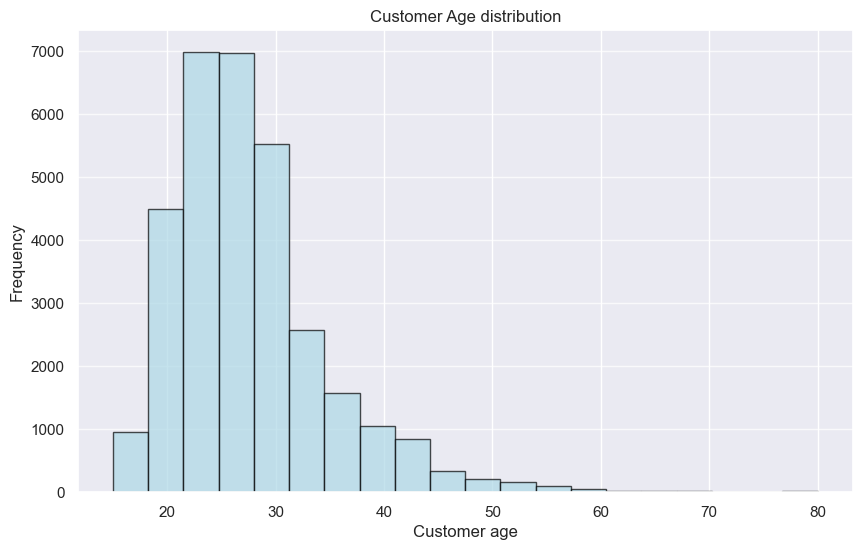

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(df['customer_age'], bins=20, color='lightblue', edgecolor='black', alpha=0.7)
plt.title('Customer Age distribution')
plt.xlabel('Customer age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


##### 5.5.3 Box plot of customer age (Graph 10.) ####

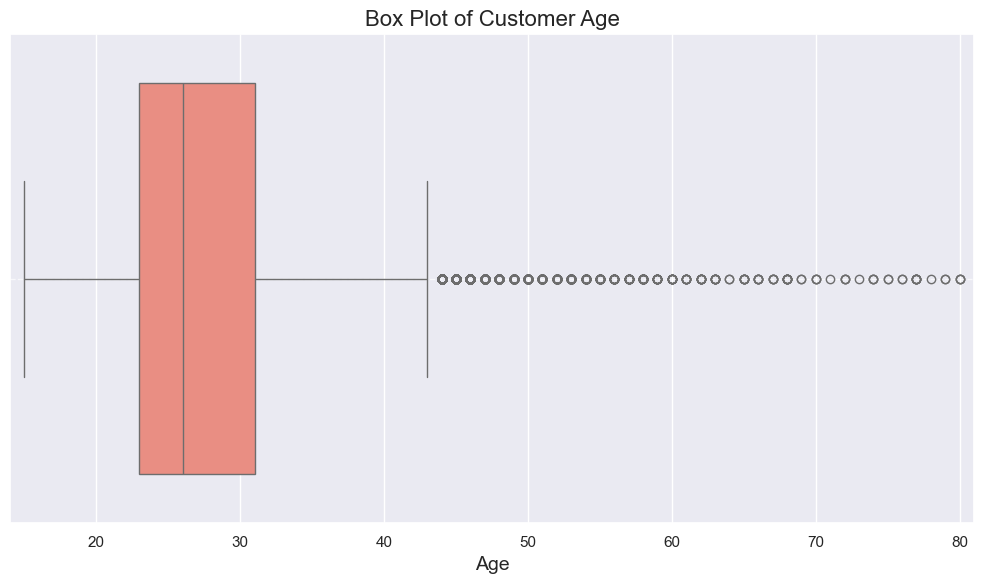

In [68]:
if df.index.has_duplicates:
    df = df.reset_index(drop=True)

plt.figure(figsize=(10, 6)) 
sns.boxplot(x=df['customer_age'], color='salmon')
plt.title('Box Plot of Customer Age', fontsize=16)
plt.xlabel('Age', fontsize=14)

# add lines 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(df['customer_age'].min() - 1, df['customer_age'].max() + 1)  
plt.tight_layout()
plt.show()

##### 5.5.3 Average value spending by age (Graph 11.) ####

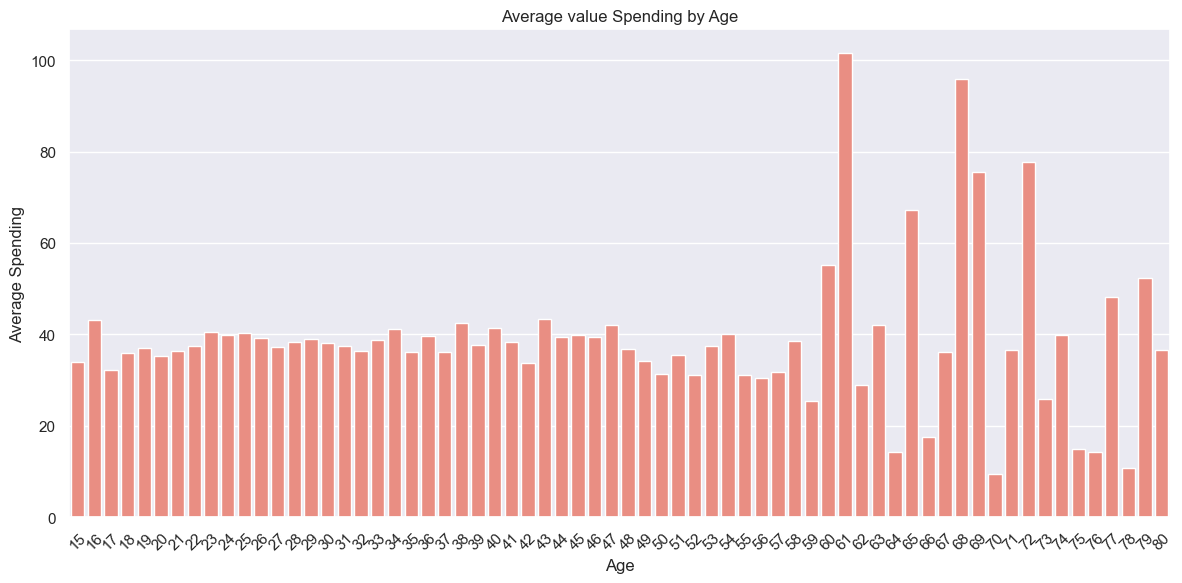

In [74]:
# Calcular a média de gastos por faixa etária
mean_spending = df.groupby('customer_age')['tot_value_cui'].mean().reset_index()

plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
sns.barplot(data=mean_spending, x='customer_age', y='tot_value_cui', color='salmon')
plt.title('Average value Spending by Age')
plt.xlabel('Age')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x
plt.tight_layout()
plt.show()


##### 5.5.3 Average order frequency by age group (Graph 12.) ####

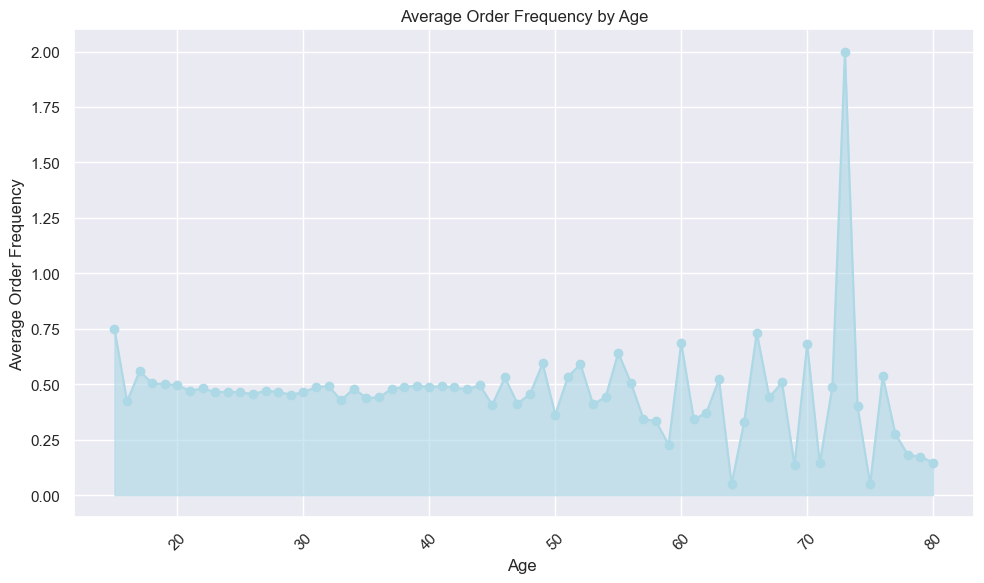

In [73]:
mean_frequency = df.groupby('customer_age')['order_frequency'].mean().reset_index()

plt.figure(figsize=(10, 6)) 
plt.fill_between(mean_frequency['customer_age'], mean_frequency['order_frequency'], color='lightblue', alpha=0.6)
plt.plot(mean_frequency['customer_age'], mean_frequency['order_frequency'], marker='o', color='lightblue')
plt.title('Average Order Frequency by Age')
plt.xlabel('Age ')
plt.ylabel('Average Order Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 5.6 Relations between important features ###

#### 5.6.1 Age and Money spent ####

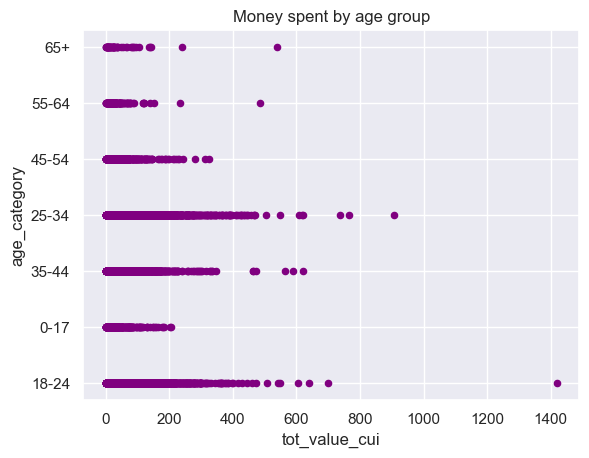

In [51]:
df.plot(kind="scatter", x="tot_value_cui", y="age_category", color="purple", title="Money spent by age group")
plt.show()

In [52]:
#sns.pairplot Para fazermos com muitas features

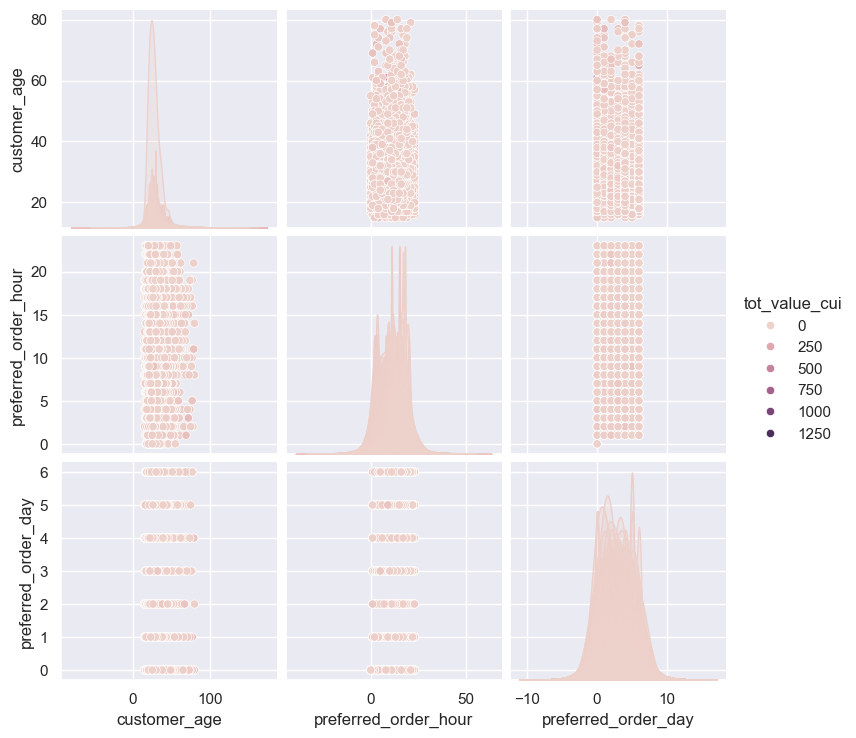

In [53]:
#Isto faz me sentido mas está muito confuso se interpretar
sns.pairplot(df, vars=["customer_age","preferred_order_hour","preferred_order_day"],hue="tot_value_cui")
plt.show()

In [54]:
df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'tot_value_cui',
       'order_duration', 'order_frequency', 'preferred_order_hour',
       'preferred_order_day', 'age_category'],
      dtype='object')

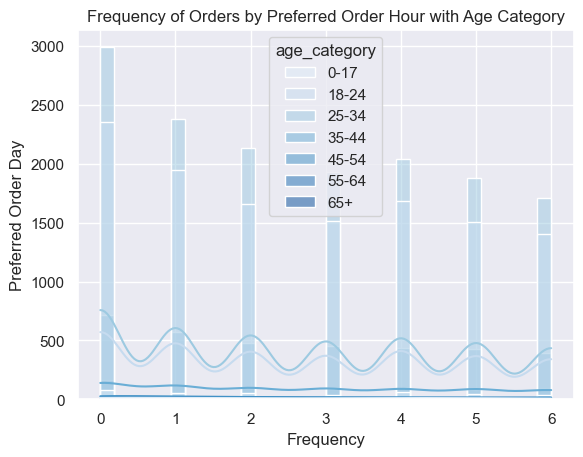

In [55]:
sns.histplot(data=df, x='preferred_order_day', hue='age_category', kde=True, palette="Blues")
plt.title("Frequency of Orders by Preferred Order Hour with Age Category")
plt.xlabel("Frequency")
plt.ylabel("Preferred Order Day")
plt.show()

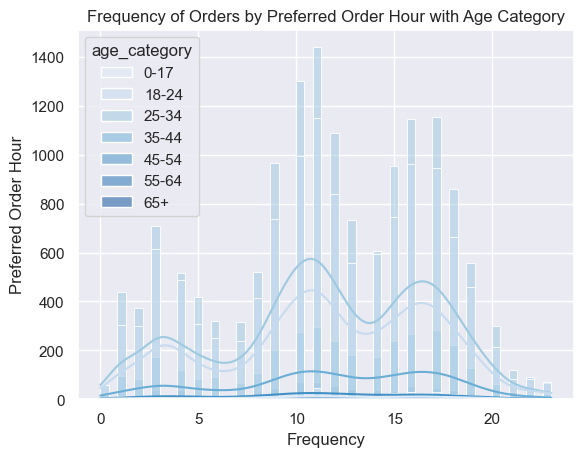

In [56]:
sns.histplot(data=df, x='preferred_order_hour', hue='age_category', kde=True, palette="Blues")
plt.title("Frequency of Orders by Preferred Order Hour with Age Category")
plt.xlabel("Frequency")
plt.ylabel("Preferred Order Hour")
plt.show()

<Axes: xlabel='age_category', ylabel='Count'>

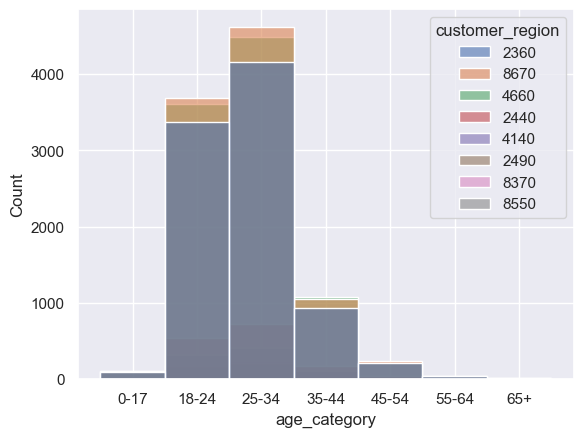

In [57]:
#Customer per age category
sns.histplot(data=df, x='age_category', hue='customer_region', kde=False, alpha=0.6)


Correlação 

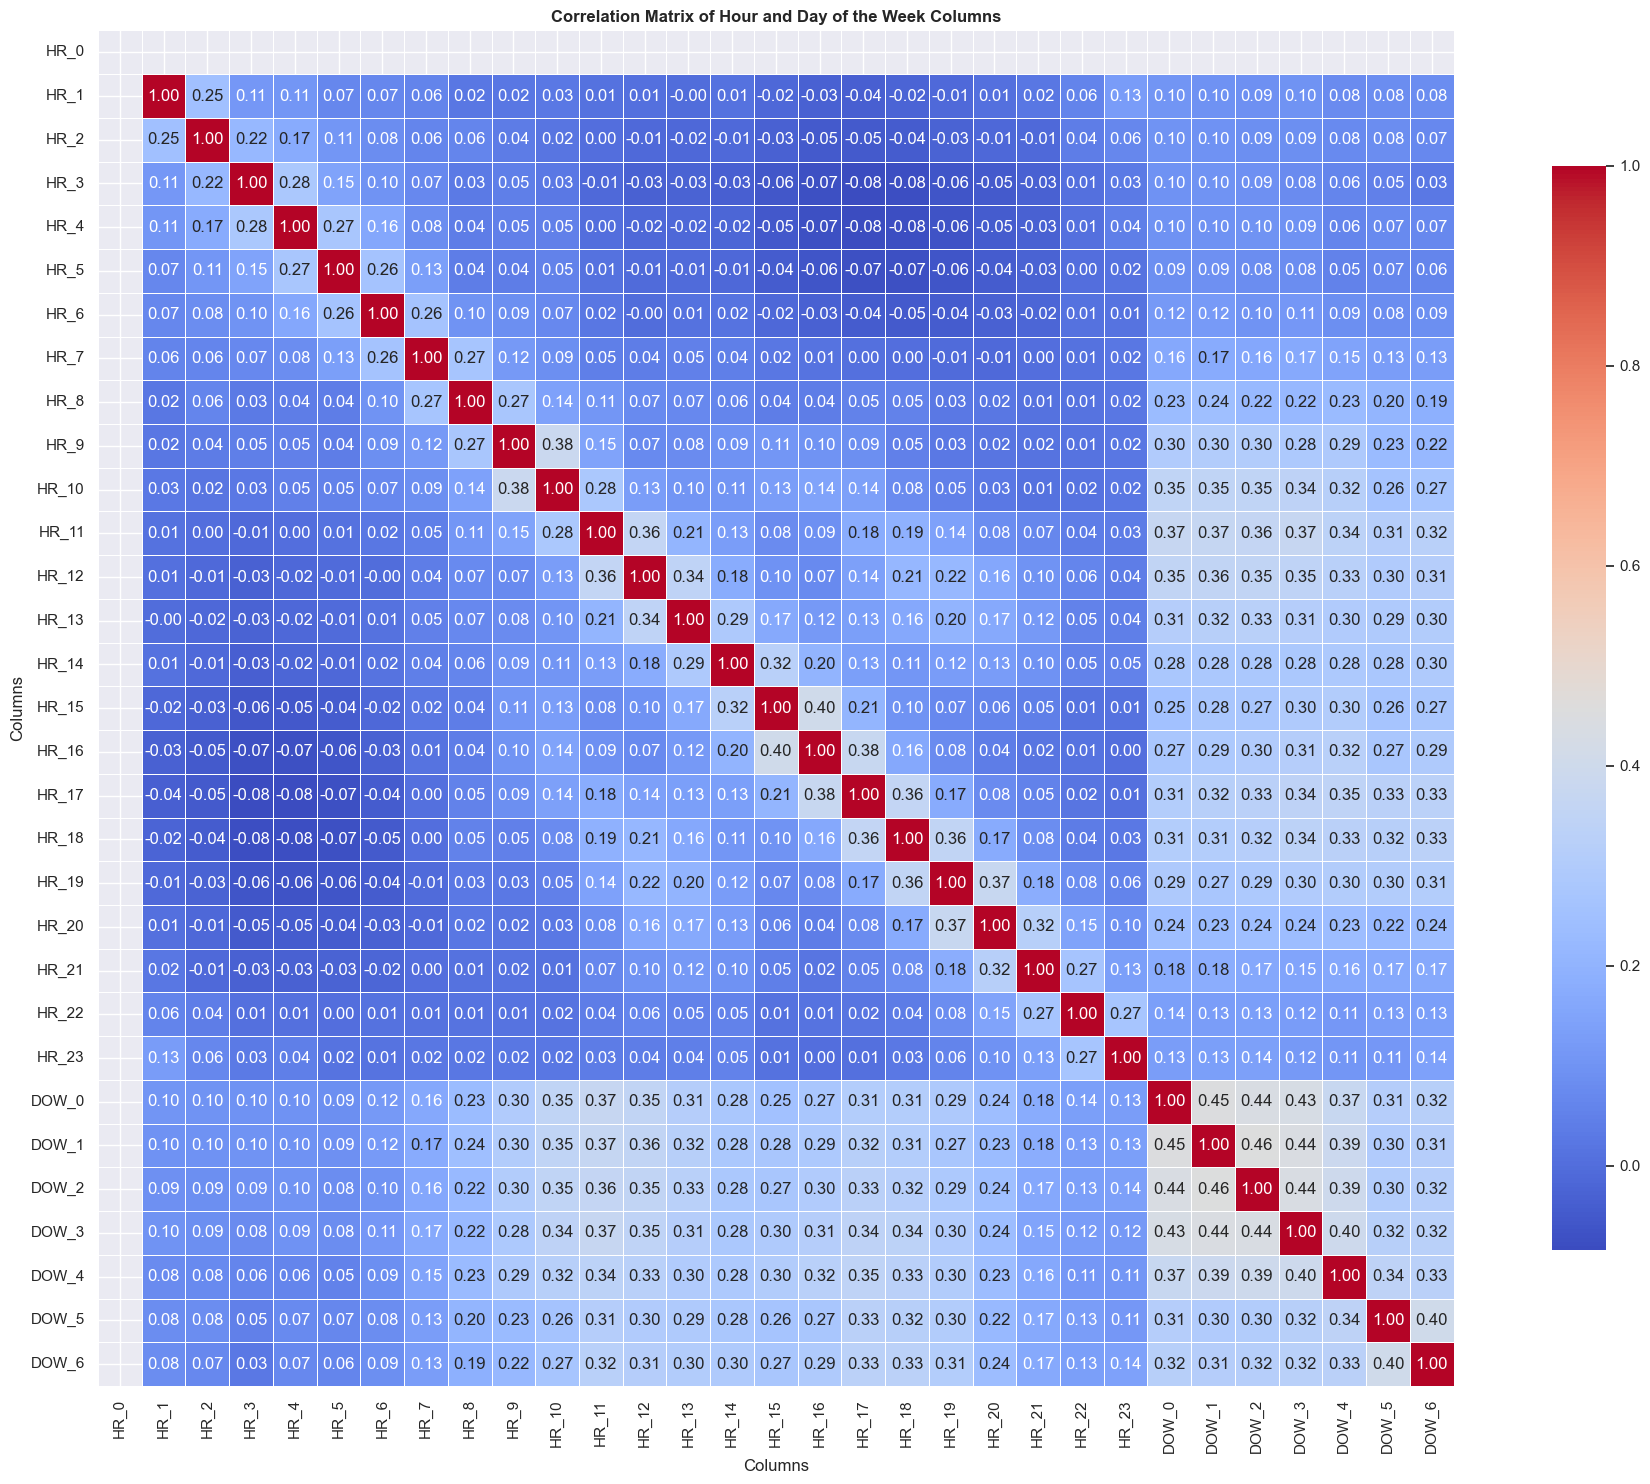

In [16]:
#ganda cagada que eu fiz aqui ahahahahhahahahahahhaha

# Assume df is your DataFrame containing the relevant columns
# First, select the relevant columns for hours and days of the week
hour_columns = [f'HR_{i}' for i in range(24)]  # HR_0 to HR_24
dow_columns = [f'DOW_{i}' for i in range(7)]   # DOW_0 to DOW_6
selected_columns = hour_columns + dow_columns

# Calculate the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar_kws={"shrink": .8}, linewidths=.5)

# Title and labels
plt.title('Correlation Matrix of Hour and Day of the Week Columns', fontweight='bold')
plt.xlabel('Columns')
plt.ylabel('Columns')

# Show the heatmap
plt.tight_layout()
plt.show()


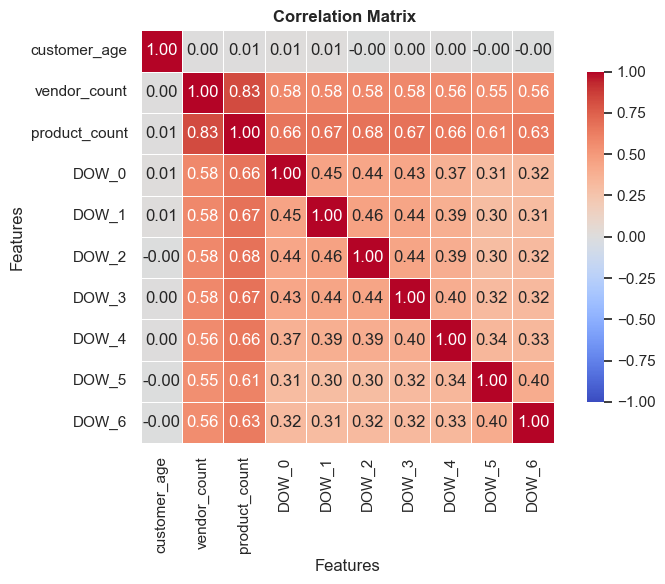

In [59]:

correlation_columns = ['customer_age','vendor_count','product_count','DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

# Calculate the correlation matrix
correlation_matrix = df[correlation_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=.5, vmin=-1, vmax=1, center=0)

# Title and labels
plt.title('Correlation Matrix ', fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the heatmap
plt.tight_layout()
plt.show()



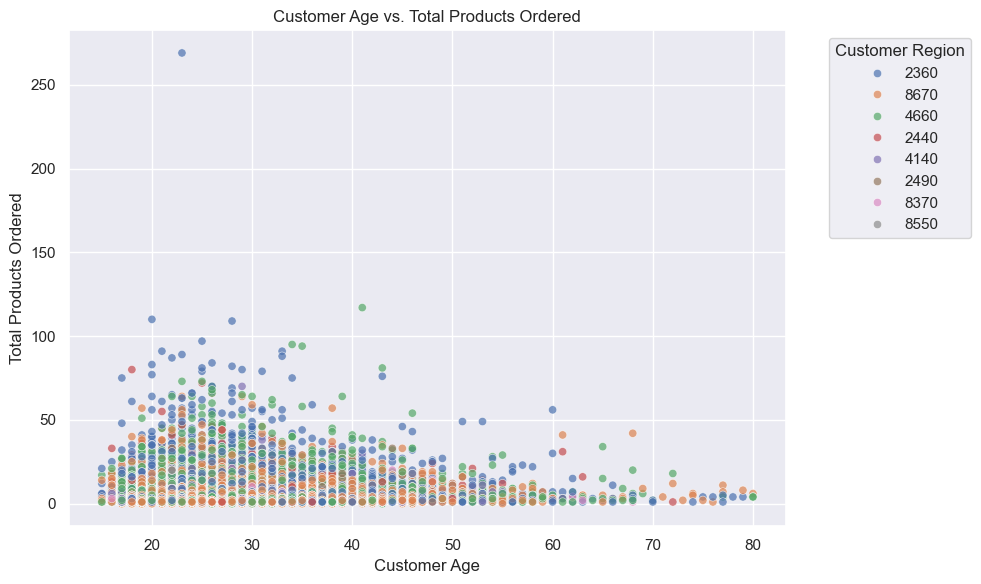

In [60]:
# Scatter plot to show the relationship between customer_age and product_count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='customer_age', y='product_count', hue='customer_region', alpha=0.7)
plt.title('Customer Age vs. Total Products Ordered')
plt.xlabel('Customer Age')
plt.ylabel('Total Products Ordered')
plt.legend(title='Customer Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [1]:
#(NÃO E PARA ANALISAR RITA É P DEPOIS VERMOS SE TIRAMOS OU NÃO :))) # Colunas e totais por hora
hourly_columns = [f'HR_{i}' for i in range(24)]
hourly_totals = df[hourly_columns].sum()
hourly_error = df[hourly_columns].std()  # Exemplo de erro com desvio padrão

# Colunas e totais por dia da semana
weekly_columns = [f'DOW_{i}' for i in range(7)]
weekly_totals = df[weekly_columns].sum()
weekly_error = df[weekly_columns].std()  # Exemplo de erro com desvio padrão

# Configurando a figura com subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'wspace': 0.4})

# Gráfico de totais por hora do dia
sns.barplot(
    x=hourly_totals.index.str.replace("HR_", ""), y=hourly_totals.values,
    yerr=hourly_error.values, color="orange", ax=axes[0], capsize=0.2
)
axes[0].set_title('Total Number of Orders by Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Total Orders')
axes[0].set_xticklabels(axes[0].get_xticks(), rotation=45)

# Gráfico de totais por dia da semana
sns.barplot(
    x=weekly_totals.index.str.replace("DOW_", ""), y=weekly_totals.values,
    yerr=weekly_error.values, color="gold", ax=axes[1], capsize=0.2
)
axes[1].set_title('Total Number of Orders by Day of the Week')
axes[1].set_xlabel('Day of the Week (0 = Sunday, 6 = Saturday)')
axes[1].set_ylabel('Total Orders')

plt.suptitle('Total Orders by Hour and Day of the Week', fontsize=16)
plt.show()


NameError: name 'df' is not defined